In [ ]:
!pip install fracdiff


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader
import seaborn
import statsmodels.tsa.stattools as stattools
from fracdiff import Fracdiff, FracdiffStat, fdiff
from fracdiff.sklearn import FracdiffStat
from pandas.plotting import register_matplotlib_converters

In [ ]:
df_america = pd.read_excel("IS-Data(2).xlsx",parse_dates=['Date'], index_col='Date')

In [ ]:
df_america

,Interest Rate,Exchange Rate (Dollar to Pound),Oil Prices
Date,,,
1990-01-01,7.00,1.651248,22.960000
1990-02-01,7.00,1.696137,22.120000
1990-03-01,7.00,1.624450,20.410000
1990-04-01,7.00,1.637195,18.430000
1990-05-01,7.00,1.677355,18.250000
...,...,...,...
2021-04-01,0.25,1.384495,61.695455
2021-05-01,0.25,1.408350,65.234762
2021-06-01,0.25,1.402473,71.377727


America


Interest rate

In [ ]:
df_USAIN = df_america['Interest Rate ']
df_USAIN

Date
1990-01-01    7.00
1990-02-01    7.00
1990-03-01    7.00
1990-04-01    7.00
1990-05-01    7.00
              ... 
2021-04-01    0.25
2021-05-01    0.25
2021-06-01    0.25
2021-07-01    0.25
2021-08-01    0.25
Name: Interest Rate , Length: 380, dtype: float64

Text(0.5, 1.0, 'Interest Rate')

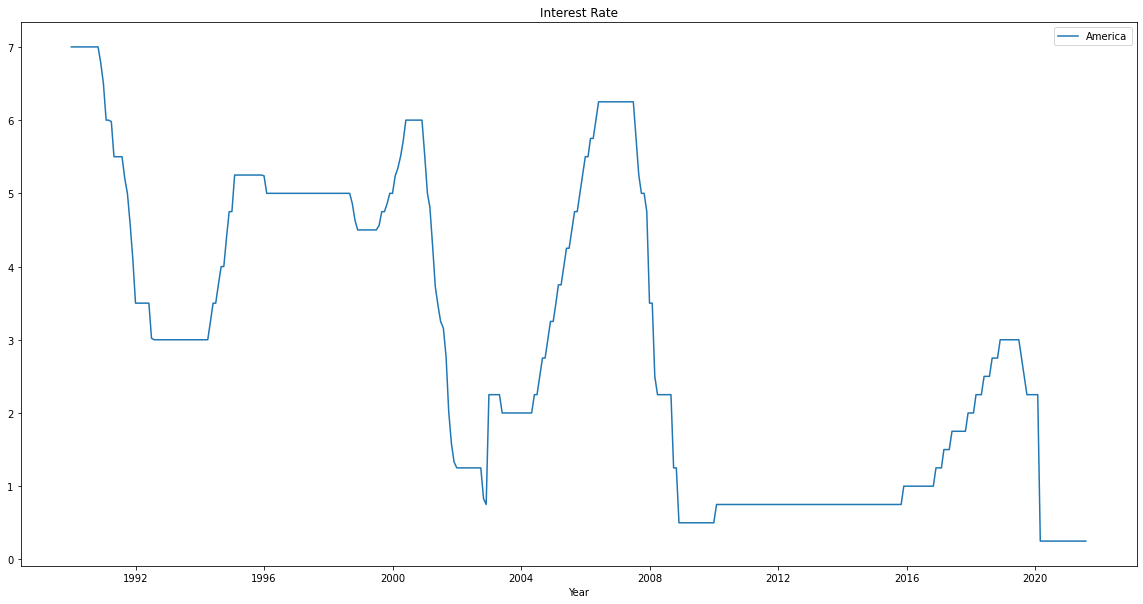

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_USAIN, label = 'America')
ax.set_xlabel('Year')
ax.legend()
plt.title("Interest Rate")

In [ ]:
X = df_USAIN.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.00
* ADF p-value: 2.52 %
* Correlation with the original time-series: 1.00


Exchange Rate

In [ ]:
df_USAEXCH = df_america['Exchange Rate (Dollar to Pound)']
df_USAEXCH

Date
1990-01-01    1.651248
1990-02-01    1.696137
1990-03-01    1.624450
1990-04-01    1.637195
1990-05-01    1.677355
                ...   
2021-04-01    1.384495
2021-05-01    1.408350
2021-06-01    1.402473
2021-07-01    1.380781
2021-08-01    1.379682
Name: Exchange Rate (Dollar to Pound), Length: 380, dtype: float64

Text(0.5, 1.0, 'Exchange Rate')

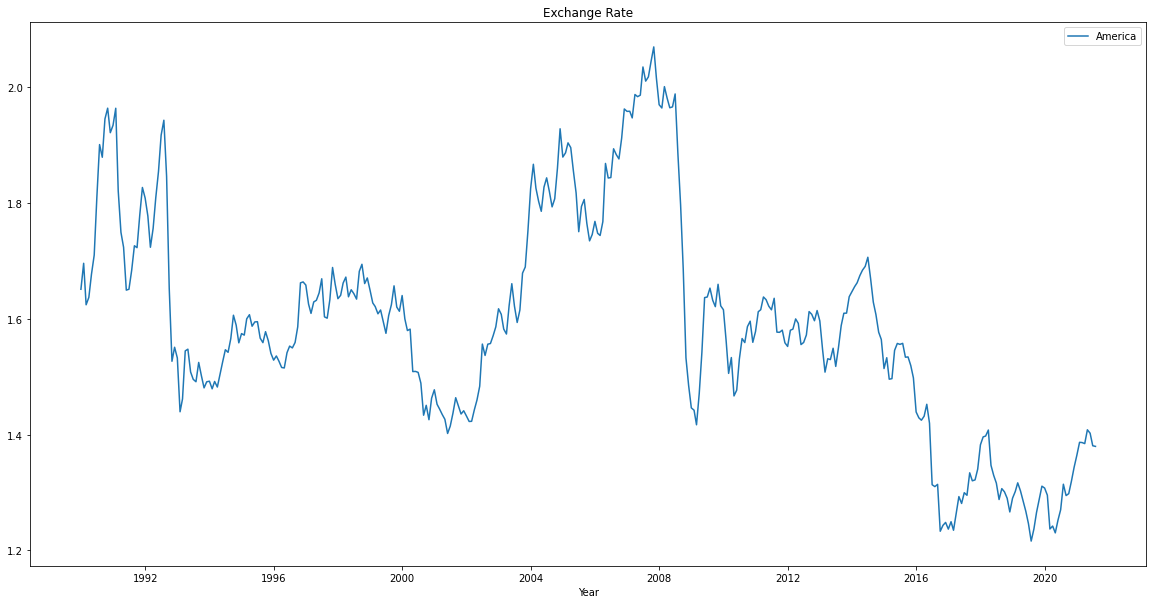

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_USAEXCH, label = 'America')
ax.set_xlabel('Year')
ax.legend()
plt.title("Exchange Rate")

In [ ]:
df_differenced = df_USAEXCH.diff().dropna()
df_differenced

Date
1990-02-01    0.044889
1990-03-01   -0.071687
1990-04-01    0.012745
1990-05-01    0.040159
1990-06-01    0.032965
                ...   
2021-04-01   -0.001831
2021-05-01    0.023855
2021-06-01   -0.005877
2021-07-01   -0.021692
2021-08-01   -0.001099
Name: Exchange Rate (Dollar to Pound), Length: 379, dtype: float64

In [ ]:
X = df_USAEXCH.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.03
* ADF p-value: 4.76 %
* Correlation with the original time-series: 1.00


TypeError: ignored

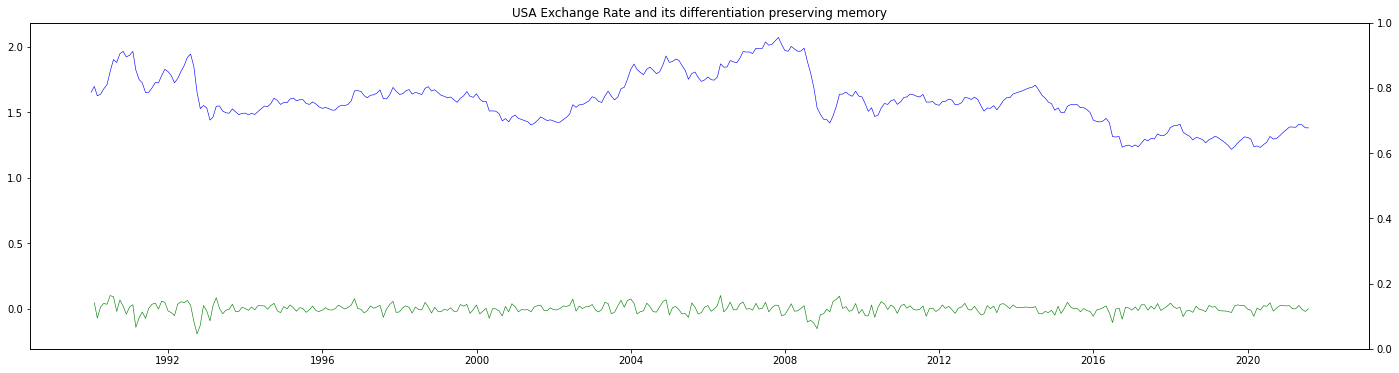

In [ ]:
df_USAEXCH_diff = pd.Series(Xdiff.reshape(-1), index=df_USAEXCH.index[-Xdiff.size :])

fig, ax_s = plt.subplots(figsize=(24, 6))
plt.title("USA Exchange Rate and its differentiation preserving memory")
ax_d = ax_s.twinx()

plot_s = ax_s.plot(df_USAEXCH, color="blue", linewidth=0.6, label="Exchange Rate (left)")
plot_ass = ax_s.plot(df_differenced, color="green", linewidth=0.6, label="Interest Rate d = 1"),


plots = plot_s + plot_ass
ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.show()

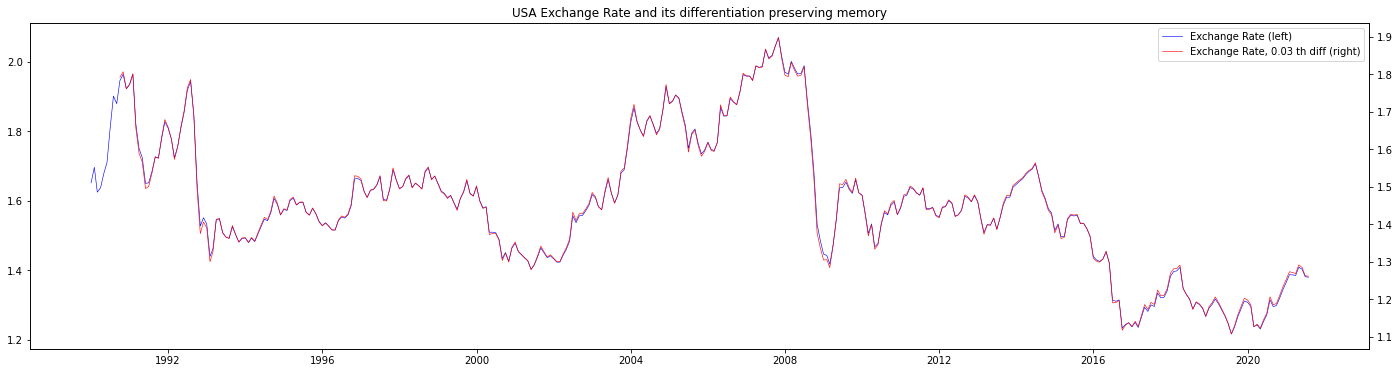

In [ ]:
df_USAEXCH_diff = pd.Series(Xdiff.reshape(-1), index=df_USAEXCH.index[-Xdiff.size :])

fig, ax_s = plt.subplots(figsize=(24, 6))
plt.title("USA Exchange Rate and its differentiation preserving memory")
ax_d = ax_s.twinx()

plot_s = ax_s.plot(df_USAEXCH, color="blue", linewidth=0.6, label="Exchange Rate (left)")
plot_d = ax_d.plot(
    df_USAEXCH_diff,
    color="red",
    linewidth=0.6,
    label=f"Exchange Rate, {fs.d_[0]:.2f} th diff (right)",
)

plots = plot_s + plot_d
ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.show()

In [ ]:
df_USAEXCH_diff

Date
1990-10-01    1.791635
1990-11-01    1.806603
1990-12-01    1.761481
1991-01-01    1.773441
1991-02-01    1.801514
                ...   
2021-04-01    1.268585
2021-05-01    1.291798
2021-06-01    1.284765
2021-07-01    1.262498
2021-08-01    1.261595
Length: 371, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

adfuller_test(df_USAEXCH_diff)

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8811
 No. Lags Chosen       = 3
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0476. Rejecting Null Hypothesis.
 => Series is Stationary.


In [ ]:
adfuller_test(df_USAEXCH)

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5903
 No. Lags Chosen       = 3
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.095. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


Oil Prices

In [ ]:
df_USAOIL = df_america['Oil Prices ']
df_USAOIL

Date
1990-01-01    22.960000
1990-02-01    22.120000
1990-03-01    20.410000
1990-04-01    18.430000
1990-05-01    18.250000
                ...    
2021-04-01    61.695455
2021-05-01    65.234762
2021-06-01    71.377727
2021-07-01    72.581818
2021-08-01    67.727273
Name: Oil Prices , Length: 380, dtype: float64

Text(0.5, 1.0, 'Oil Prices')

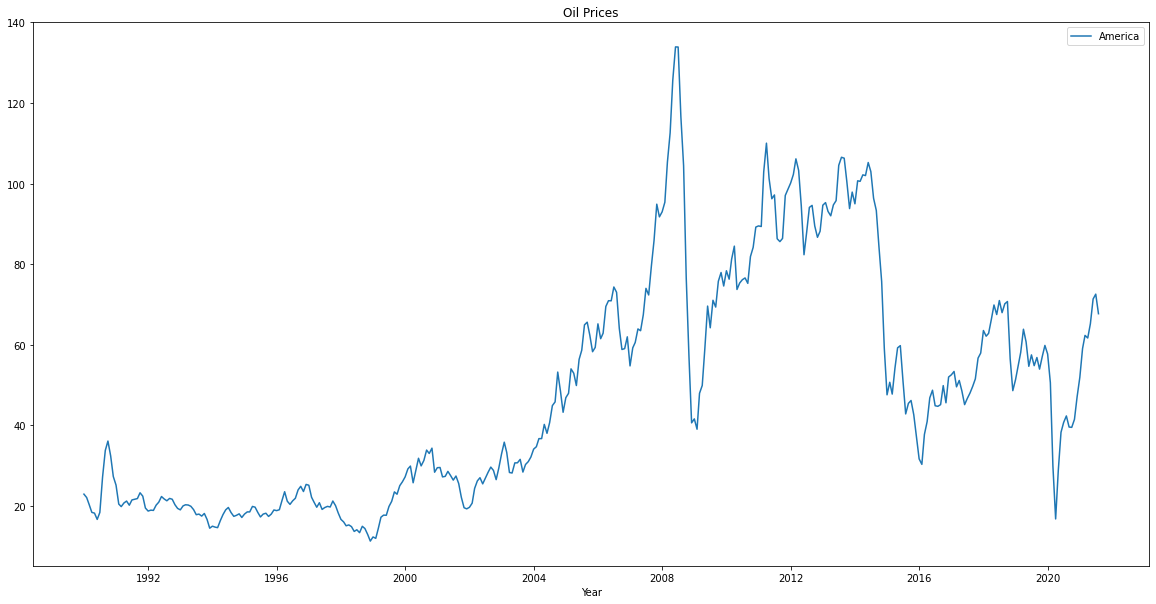

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_USAOIL, label = 'America')
ax.set_xlabel('Year')
ax.legend()
plt.title("Oil Prices")

In [ ]:
df_differenced = df_USAOIL.diff().dropna()
df_differenced

Date
1990-02-01   -0.840000
1990-03-01   -1.710000
1990-04-01   -1.980000
1990-05-01   -0.180000
1990-06-01   -1.560000
                ...   
2021-04-01   -0.654545
2021-05-01    3.539307
2021-06-01    6.142965
2021-07-01    1.204091
2021-08-01   -4.854545
Name: Oil Prices , Length: 379, dtype: float64

In [ ]:
X = df_USAOIL.values.reshape(-1, 1)

fs = FracdiffStat(mode="valid")

Xdiff = fs.fit_transform(X)
_, pvalue, _, _, _, _ = stattools.adfuller(Xdiff.reshape(-1))
corr = np.corrcoef(X[-Xdiff.size :, 0], Xdiff.reshape(-1))[0][1]

print("* Order: {:.2f}".format(fs.d_[0]))
print("* ADF p-value: {:.2f} %".format(100 * pvalue))
print("* Correlation with the original time-series: {:.2f}".format(corr))

* Order: 0.12
* ADF p-value: 4.64 %
* Correlation with the original time-series: 0.99


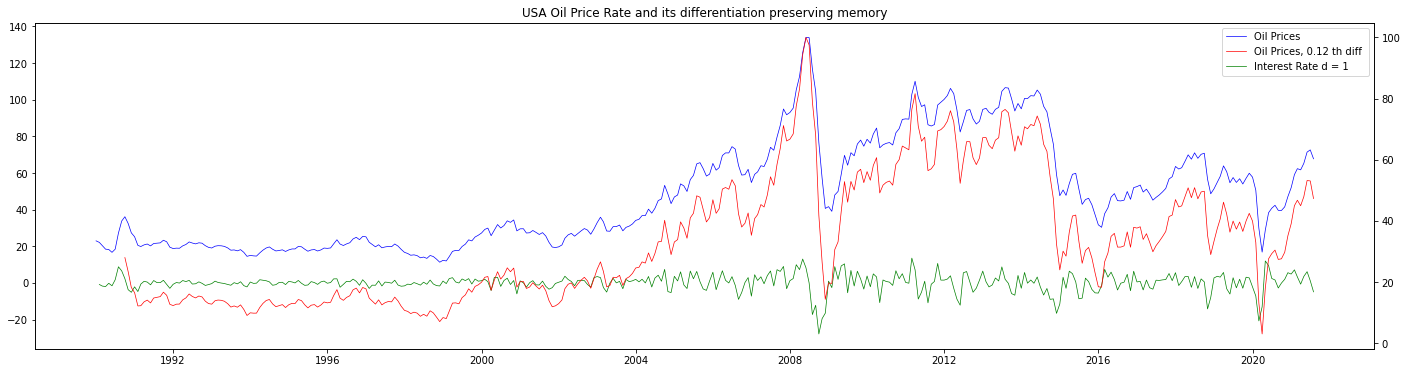

In [ ]:
df_USAOIL_diff = pd.Series(Xdiff.reshape(-1), index=df_USAOIL.index[-Xdiff.size :])

fig, ax_s = plt.subplots(figsize=(24, 6))
plt.title("USA Oil Price Rate and its differentiation preserving memory")
ax_d = ax_s.twinx()

plot_s = ax_s.plot(df_USAOIL, color="blue", linewidth=0.7, label="Oil Prices ")
plot_d = ax_d.plot(
    df_USAOIL_diff,
    color="red",
    linewidth=0.7,
    label=f"Oil Prices, {fs.d_[0]:.2f} th diff ",

)

plot_ass = ax_s.plot(df_differenced, color="green", linewidth=0.7, label="Interest Rate d = 1")
plots = plot_s + plot_d + plot_ass

ax_s.legend(plots, [p.get_label() for p in plots], loc=0)
plt.show()

In [ ]:
adfuller_test(df_USAOIL_diff)

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8906
 No. Lags Chosen       = 1
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0464. Rejecting Null Hypothesis.
 => Series is Stationary.


In [ ]:
adfuller_test(df_USAOIL)

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4888
 No. Lags Chosen       = 1
 Critical value 1%     = -3.448
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.1182. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


Merging the datasets

In [ ]:
df_america_diff = pd.concat([df_USAEXCH_diff, df_USAOIL_diff], axis=1)
df_america_diff

,0,1
Date,,
1990-10-01,1.791635,28.007747
1990-11-01,1.806603,23.409049
1990-12-01,1.761481,18.224202
1991-01-01,1.773441,16.540802
1991-02-01,1.801514,12.190718
...,...,...
2021-04-01,1.268585,44.951787
2021-05-01,1.291798,47.910097
2021-06-01,1.284765,53.182725


In [ ]:
df_america_diff.columns =['Exchange Rate', 'Oil Prices']

In [ ]:
df_america_diff = pd.concat([df_america_diff,df_USAIN], axis=1)
df_america_diff

,Exchange Rate,Oil Prices,Interest Rate
Date,,,
1990-01-01,NaN,NaN,7.00
1990-02-01,NaN,NaN,7.00
1990-03-01,NaN,NaN,7.00
1990-04-01,NaN,NaN,7.00
1990-05-01,NaN,NaN,7.00
...,...,...,...
2021-04-01,1.268585,44.951787,0.25
2021-05-01,1.291798,47.910097,0.25
2021-06-01,1.284765,53.182725,0.25


In [ ]:
df_america_diff.dropna(subset = ["Exchange Rate", "Oil Prices"], inplace=True)

In [ ]:
df_america_diff

,Exchange Rate,Oil Prices,Interest Rate
Date,,,
1990-10-01,1.791635,28.007747,7.00
1990-11-01,1.806603,23.409049,7.00
1990-12-01,1.761481,18.224202,6.79
1991-01-01,1.773441,16.540802,6.50
1991-02-01,1.801514,12.190718,6.00
...,...,...,...
2021-04-01,1.268585,44.951787,0.25
2021-05-01,1.291798,47.910097,0.25
2021-06-01,1.284765,53.182725,0.25


Running the VAR model

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

model = VAR(df_america_diff)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -6.749377904163286
BIC :  -6.622453482358802
FPE :  0.0011716112076050297
HQIC:  -6.698962441613483 

Lag Order = 2
AIC :  -6.944986592110092
BIC :  -6.722420929441119
FPE :  0.0009634664076578124
HQIC:  -6.856572537996945 

Lag Order = 3
AIC :  -7.000012072475174
BIC :  -6.681418354689663
FPE :  0.0009119075687515048
HQIC:  -6.87343793070576 

Lag Order = 4
AIC :  -7.048220773875105
BIC :  -6.633209569313448
FPE :  0.0008690309522788543
HQIC:  -6.883323943821827 

Lag Order = 5
AIC :  -7.033452590435619
BIC :  -6.521631825399375
FPE :  0.0008820292757628226
HQIC:  -6.830069356591097 

Lag Order = 6
AIC :  -7.048694800396528
BIC :  -6.439669734220632
FPE :  0.0008687872928979742
HQIC:  -6.80666032190579 

Lag Order = 7
AIC :  -7.075526786325723
BIC :  -6.36889998614983
FPE :  0.0008459212804876061
HQIC:  -6.794675086393943 

Lag Order = 8
AIC :  -7.093831794102862
BIC :  -6.2892031093373975
FPE :  0.0008307541940948325
HQIC:  -6.773995749276852 

Lag Order = 9
AIC 

In [ ]:
x = model.select_order(maxlags=16)
x.summary()

,AIC,BIC,FPE,HQIC
0,3.215,3.247,24.89,3.228
1,-6.820,-6.689,0.001092,-6.768
2,-6.999,-6.770*,0.0009126,-6.908
3,-7.056,-6.729,0.0008622,-6.926
4,-7.096*,-6.671,0.0008282*,-6.927*
5,-7.075,-6.551,0.0008464,-6.866
6,-7.050,-6.428,0.0008679,-6.802
7,-7.081,-6.361,0.0008414,-6.795
8,-7.089,-6.271,0.0008350,-6.763
9,-7.059,-6.143,0.0008601,-6.695


In [ ]:
results = VAR(df_america_diff).fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Mar, 2022
Time:                     01:02:28
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -6.63321
Nobs:                     367.000    HQIC:                  -6.88332
Log likelihood:          -229.903    FPE:                0.000869031
AIC:                     -7.04822    Det(Omega_mle):     0.000782857
--------------------------------------------------------------------
Results for equation Exchange Rate
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.045314         0.015791            2.870           0.004
L1.Exchange Rate          1.225299         0.054136           22.634           0.000
L1.Oil Prices             0.001545  

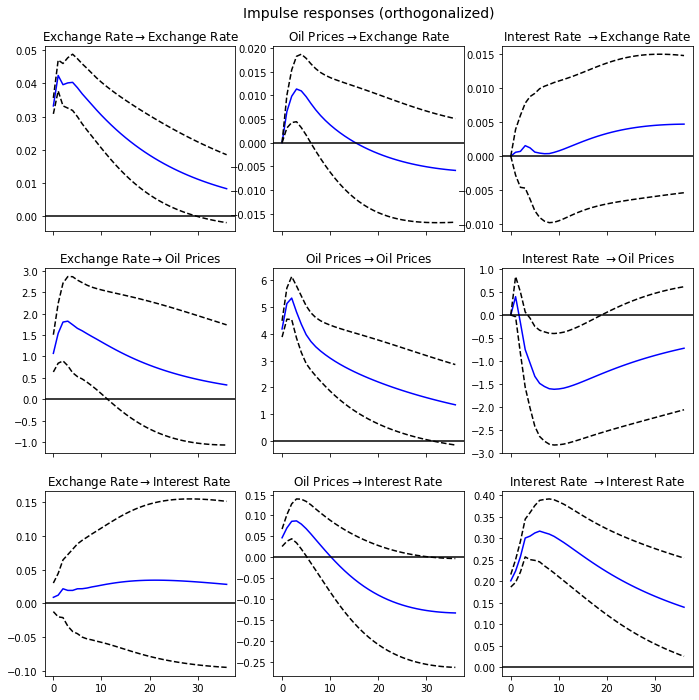

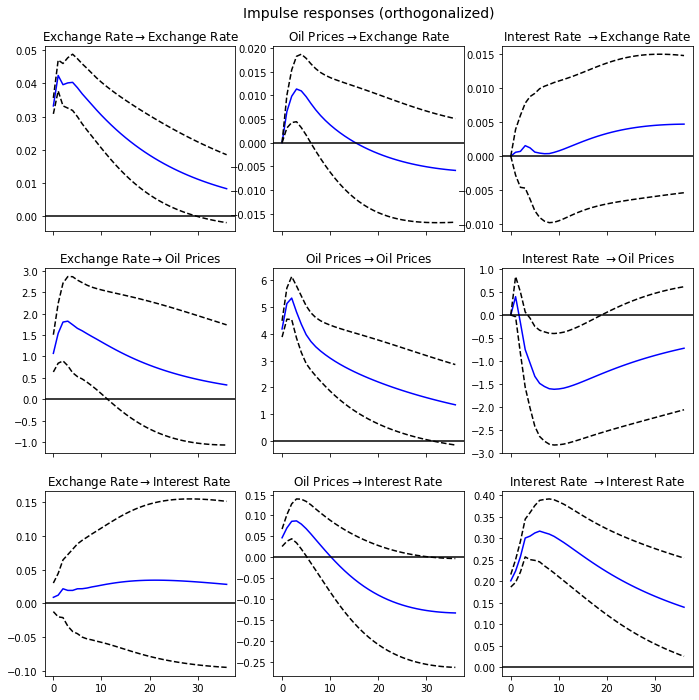

In [ ]:
irf = results.irf(36)
irf.plot(orth=True)

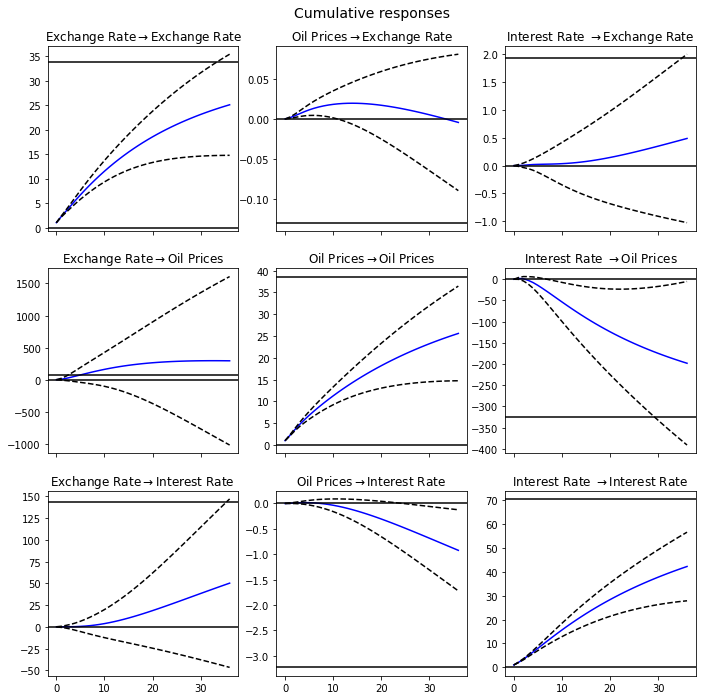

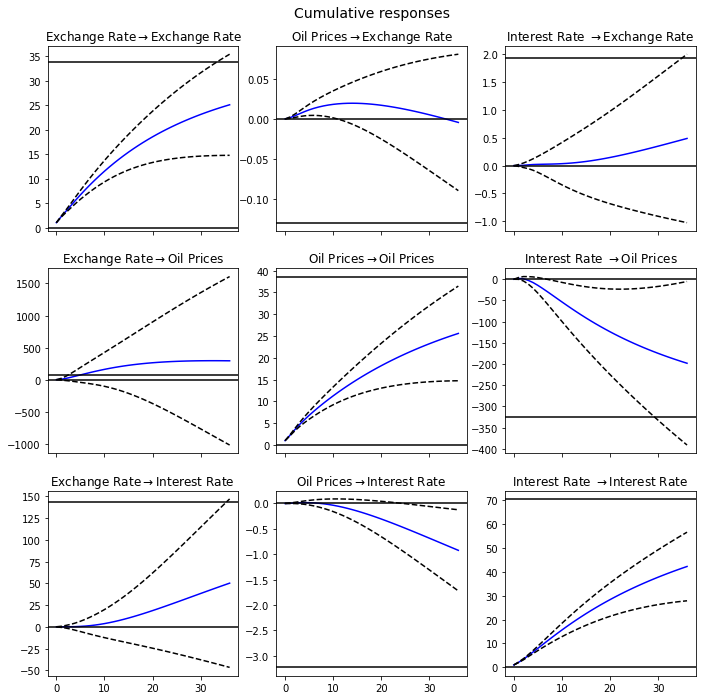

In [ ]:
irf.plot_cum_effects(orth=False)